# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Reyhan Eldwin Maulana
- **Email:** reyhaneldwin31@gmail.com
- **ID Dicoding:** reyhanem31

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan pola trend penyewa sepeda pada tahun 2011 dan 2012?
- Jam berapakah yang paling banyak menyewa sepeda pada saat workingday?
- Berapakah perbandingan jumlah penyewa sepeda setiap musim dalam 2 tahun?
- Apakah cuaca mempengaruhi seseorang dalam melakukan penyewaan sepeda?
- Bagaimana kondisi persewaan pada saat weekday dan weekend?




## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Pada tahap gathering data disini saya mengupload data tersebut pada google drive saya, sehingga saya perlu menyambungkan google drive saya kedalam google colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data day.csv yang ada pada google drive dimasukan kedalam variable dayData

In [3]:
dayData = pd.read_csv('/content/drive/MyDrive/Data/day.csv')
dayData.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Data hour.csv yang ada pada google drive dimasukan kedalam variable hourData

In [4]:
hourData = pd.read_csv('/content/drive/MyDrive/Data/hour.csv')
hourData.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada tahap assesing data disini saya memahami struktur data dan informasi data

#### Informasi Data

Masing-masing `hour.csv` dan `day.csv` memiliki kolom-kolom berikut, kecuali `hr` yang tidak ada dalam data `day.csv`.

- `instant`: indeks rekaman
- `dteday`: tanggal
- `season`: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
- `yr`: tahun (0: 2011, 1: 2012)
- `mnth`: bulan (1 hingga 12)
- `hr`: jam (0 hingga 23)
- `holiday`: apakah hari cuaca adalah hari libur atau tidak (diekstraksi dari [jadwal libur](http://dchr.dc.gov/page/holiday-schedule))
- `weekday`: hari dalam seminggu
- `workingday`: jika hari bukan akhir pekan atau libur adalah 1, sebaliknya adalah 0.
- `weathersit`:
  - 1: Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan
  - 2: Kabut + Berawan, Kabut + Awan Pecah, Kabut + Sedikit awan, Kabut
  - 3: Salju ringan, Hujan ringan + Petir + Awan berkepul-kepul, Hujan ringan + Awan berkepul-kepul
- `temp`: Suhu ter-normalisasi dalam Celsius. Nilainya dibagi dengan 41 (maks)
- `atemp`: Suhu ter-normalisasi perasaan dalam Celsius. Nilainya dibagi dengan 50 (maks)
- `hum`: Kelembaban ter-normalisasi. Nilainya dibagi dengan 100 (maks)
- `windspeed`: Kecepatan angin ter-normalisasi. Nilainya dibagi dengan 67 (maks)
- `casual`: jumlah pengguna casual
- `registered`: jumlah pengguna terdaftar
- `cnt`: jumlah total sepeda yang disewakan termasuk pengguna casual dan terdaftar.



Berikut merupakan informasi data dayData dan hourData

In [5]:
print('Informasi data dayData')
dayData.info()

Informasi data dayData
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
print('Informasi data hourData')
hourData.info()

Informasi data hourData
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada kolom dteday dari masing masing data bertipe object yang mana kita akan rubah menjadi format date pada bagian cleaning data

Dalam pengecekan missing value dari kedua data tidak ditemukannya missing value

In [7]:
print("Mengecek apakah terdapat missing value")
print("Missing value pada dayData:\n", + dayData.isna().sum())
print("Missing value pada hourData:\n", + hourData.isna().sum())

Mengecek apakah terdapat missing value
Missing value pada dayData:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Missing value pada hourData:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Dalam pengecekan duplikasi data pada kedua data tidak ditemukannya data duplikasi

In [8]:
print("Mengecek duplikasi data")
print("Data duplikat pada dayData: ", + dayData.duplicated().sum())
print("Data duplikat pada hourData: ", + hourData.duplicated().sum())

Mengecek duplikasi data
Data duplikat pada dayData:  0
Data duplikat pada hourData:  0


#### Berikut merupakan informasi data statistika deskriptif dari masing masing data


In [9]:
dayData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hourData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Merubah tipe data dteday masing masing data menjadi tipe data date

In [11]:
dayData['dteday'] = pd.to_datetime(dayData['dteday'])
hourData['dteday'] = pd.to_datetime(hourData['dteday'])
print("Format data dteday telah diubah")
dayData['dteday'].info()
print("")
hourData['dteday'].info()

Format data dteday telah diubah
<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


## Exploratory Data Analysis (EDA)

### Pivot Table

membuat sebuah pivot

Membuat sebuah pivot berdasarkan masing masing tahun dan bulan dab menghitung jumlah sewa pada tahun 2011 dan 2012

In [12]:
grouped_by_year_month = hourData.groupby(['yr', 'mnth'])
total_rentals_per_month = grouped_by_year_month['cnt'].sum()
pivot_table = total_rentals_per_month.unstack('yr')

In [13]:
grouped_by_year = hourData.groupby('yr')
total_rentals_per_year = grouped_by_year['cnt'].sum()
print(total_rentals_per_year)

yr
0    1243103
1    2049576
Name: cnt, dtype: int64


Membuat pivot tabel berdasarkan workingday dan hr pada data hourDat, dan menghitung jumlah penyewaan untuk kelompok workingday setiap jamnya

In [14]:
# Kelompokkan data berdasarkan 'workingday' dan 'hr' dari DataFrame hourData, kemudian hitung jumlah penyewaan sepeda ('cnt') untuk setiap kelompok
grouped_workingday_data = hourData.groupby(['workingday', 'hr'])['cnt'].sum()
pivot_workingday_table = grouped_workingday_data.unstack('workingday')
pivot_workingday_table_sorted = pivot_workingday_table.sort_values(by=1, ascending=False)
print(pivot_workingday_table_sorted)


workingday      0       1
hr                       
17          74740  262120
18          64643  245129
8           24406  236595
19          53285  173504
16          81480  146268
7           10027  144144
20          40190  124360
9           39645  119793
15          82886  100263
12          84606   99808
13          86101   98818
21          32674   92771
14          84233   91419
11          72838   78482
22          26694   68918
10          59115   67142
6            4292   50840
23          19764   44177
0           20884   18246
5            1929   12332
1           15987    8177
2           12123    4229
4            1876    2552
3            5851    2323


Menghitung jumlah sewa pada hari kerja dan non hari kerja berdasarkan status penyewa

In [15]:
# Membagi data berdasarkan workingday
workingday_data = dayData[dayData['workingday'] == 1]
non_workingday_data = dayData[dayData['workingday'] == 0]

# Menghitung total casual, registered, dan cnt untuk setiap jenis hari
workingday_total = workingday_data[['casual', 'registered', 'cnt']].sum()
non_workingday_total = non_workingday_data[['casual', 'registered', 'cnt']].sum()
print(workingday_total)
print(non_workingday_total)

casual         303285
registered    1989125
cnt           2292410
dtype: int64
casual         316732
registered     683537
cnt           1000269
dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan pola trend penyewa sepeda pada tahun 2011 dan 2012?

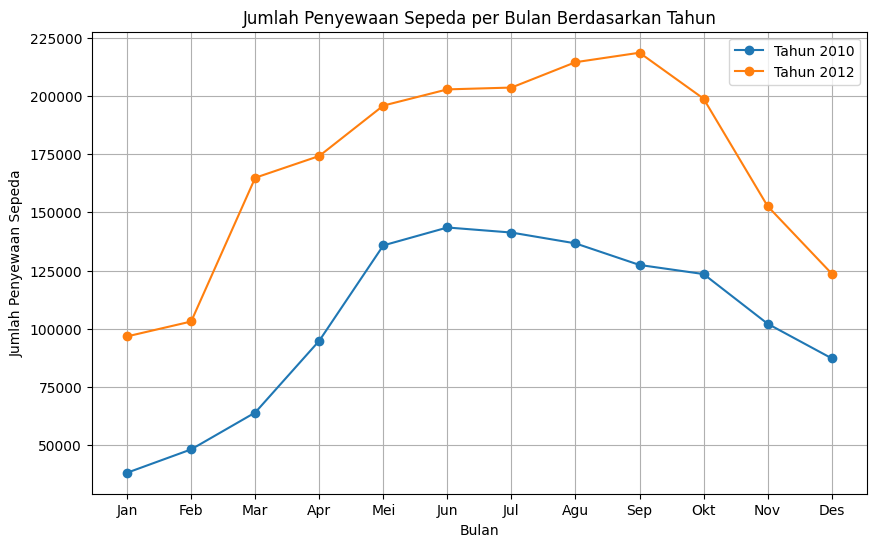

In [16]:
plt.figure(figsize=(10, 6))
for year in pivot_table.columns:
    legend_label = f'Tahun {year+2010}' if year == 0 else f'Tahun {year + 2011}'
    plt.plot(pivot_table.index, pivot_table[year], label=legend_label, marker='o', linestyle='-')

plt.title('Jumlah Penyewaan Sepeda per Bulan Berdasarkan Tahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid(True)
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()


#### Insight
- Berdasarkan dari visualisasi data tersebut menunjukan bahwa penyewa pada tahun 2012 lebih banyak daripada penyewa pada tahun 2011.
- Pada bulan januari hingga juni, kedua tahun mengalami peningkatan tren.

### Pertanyaan 2: Jam berapakah yang paling banyak menyewa sepeda pada saat workingday?

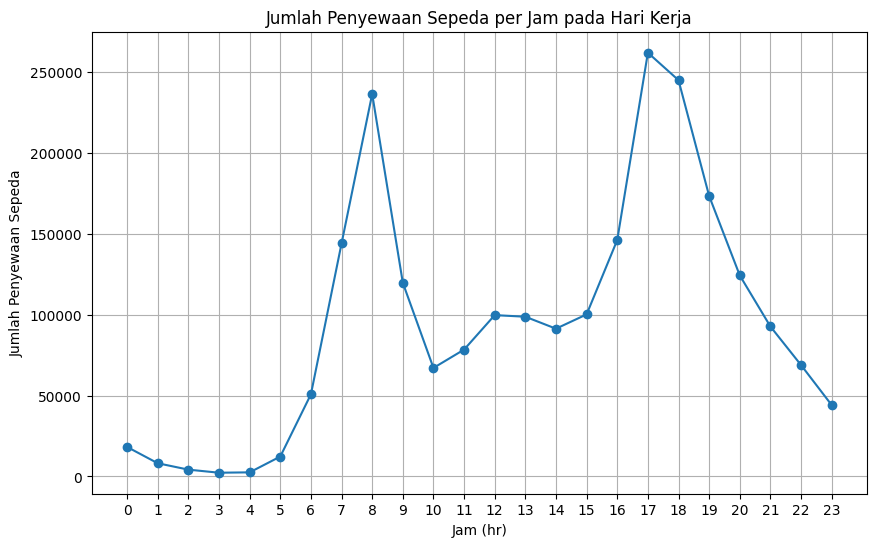

In [17]:
workingday_data = pivot_workingday_table[1]
plt.figure(figsize=(10, 6))
plt.plot(workingday_data.index, workingday_data.values, marker='o', linestyle='-')
plt.title('Jumlah Penyewaan Sepeda per Jam pada Hari Kerja')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid(True)
plt.xticks(range(24))
plt.show()

#### Insight
- Berdasarkan grafik diatas menunjukan bahwa pada jam 5-8 dan 15-17 mengalami kenaikan penyewaan yang mana ini berhubungan dengan rush hour(mulai beraktivitas/pulang ke rumah)
- Sedangkan untuk jam 8-10 dan 17-4 mengalami penurunan penyewaan yang mana menunjukan bahwa orang-orang sudah berada di kantor/rumah/sekolah

### Pertanyaan 3: Berapakah perbandingan jumlah penyewa sepeda setiap musim dalam 2 tahun?

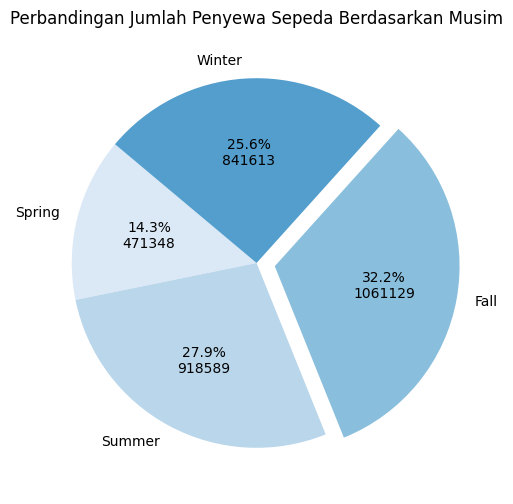

In [18]:
plt.figure(figsize=(10, 6))
season_counts = dayData.groupby('season')['cnt'].sum().reset_index()
explode = (0, 0, 0.1, 0)
color_palette = sns.color_palette("Blues")
patches, texts, autotexts = plt.pie(season_counts['cnt'], labels=['Spring', 'Summer', 'Fall', 'Winter'], autopct='%1.1f%%', explode=explode, colors=color_palette, startangle=140)
for i, text in enumerate(autotexts):
    percentage = float(text.get_text().strip('%'))
    count = season_counts['cnt'][i]
    text.set_text(f"{percentage:.1f}%\n{count}")
plt.title('Perbandingan Jumlah Penyewa Sepeda Berdasarkan Musim')
plt.show()

#### Insight
Berdasarkan visualisasi tersebut menunjukan jumlah penyewaan terbanyak berdasarkan musim adalah musim gugur (fall) sedangkan penyewaan yang paling sedikit adalah musim semi (spring)

### Pertanyaan 4: Apakah cuaca mempengaruhi seseorang dalam melakukan penyewaan sepeda?

<ipython-input-19-a02f95b20c2b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


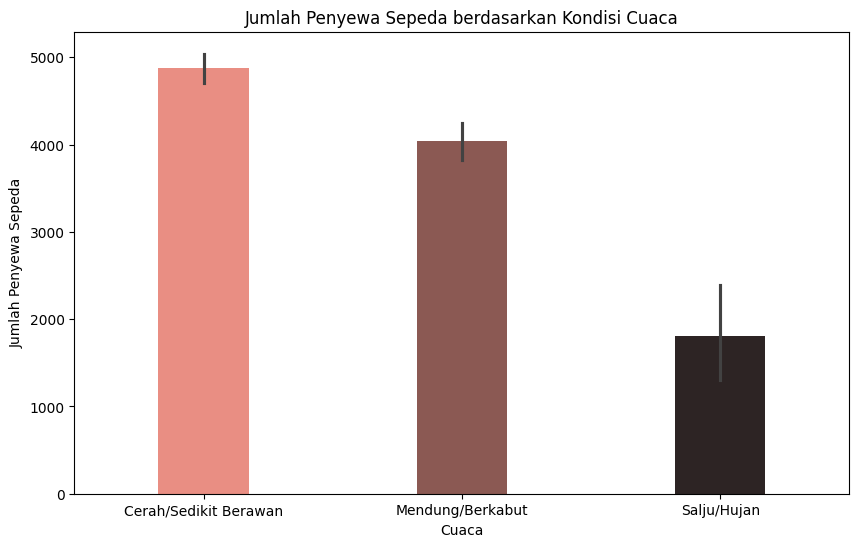

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=dayData,
    palette= 'dark:salmon_r',
    width=.35)
plt.xticks(ticks=[0, 1, 2], labels=['Cerah/Sedikit Berawan', 'Mendung/Berkabut', 'Salju/Hujan'])
plt.title('Jumlah Penyewa Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

#### Insight
- Berdasarkan visualisasi tersebut menunjukan bahwa penyewa pada saat cuaca turun salju ataupun hujan lebih sedikit dibandingkan pada saat cerah/sedikit berawan.
- Hal ini menunjukan bahwa cuaca sangat mempengaruhi seseorang dalam melakukan penyewaan sepeda

### Pertanyaan 5: Bagaimana kondisi persewaan pada saat weekday dan weekend berdasarkan jenis penyewa?

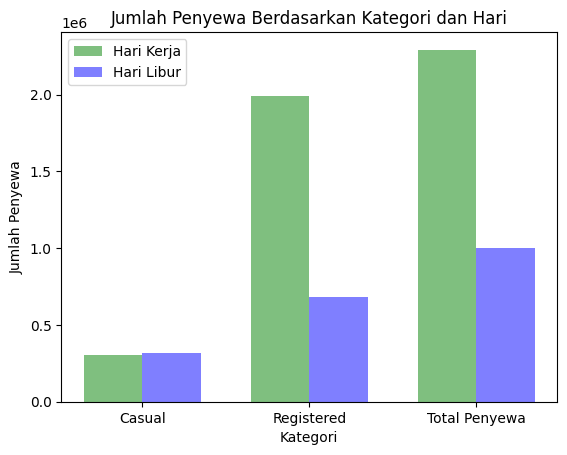

In [20]:
# Menyiapkan data untuk plotting
categories = ['Casual', 'Registered', 'Total Penyewa']
workingday_values = [workingday_total['casual'], workingday_total['registered'], workingday_total['cnt']]
non_workingday_values = [non_workingday_total['casual'], non_workingday_total['registered'], non_workingday_total['cnt']]

# Membuat bar plot
bar_width = 0.35
index = range(len(categories))

plt.bar(index, workingday_values, bar_width, label='Hari Kerja', color='#7fbf7f')
plt.bar([i + bar_width for i in index], non_workingday_values, bar_width, label='Hari Libur', color='#7f7fff')

plt.xlabel('Kategori')
plt.ylabel('Jumlah Penyewa')
plt.title('Jumlah Penyewa Berdasarkan Kategori dan Hari')
plt.xticks([i + bar_width / 2 for i in index], categories)
plt.legend()
plt.show()


#### Insight
- Dari visualisasi tersebut menunjukan bahwa hari kerja lebih diminati untuk seorang melakukan penyewaan
- Untuk penyewa dengan status registered lebih sering menyewa pada hari kerja sedangkan untuk status casual lebih sering menyewa pada hari libur

### RFM Analysis

Analisis RFM untuk setiap hari dalam seminggu, dengan kolom untuk recency, frequency, dan nilai moneter.

In [21]:
rfm_analysis = dayData.groupby(by="weekday", as_index=False).agg({
    "dteday": "max", # Tanggal akhir order
    "instant": "nunique", # Menghitung kuantitas order
    "cnt": "sum" # Menghitung jumlah penyewa
})

rfm_analysis.columns = ["weekday", "max_order_timestamp", "frequency", "monetary"]

rfm_analysis["max_order_timestamp"] = rfm_analysis["max_order_timestamp"].dt.date
recent_date = dayData["dteday"].dt.date.max()
rfm_analysis["recency"] = rfm_analysis["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_analysis.drop("max_order_timestamp", axis=1, inplace=True)
rfm_analysis

,weekday,frequency,monetary,recency
0,0,105,444027,1
1,1,105,455503,0
2,2,104,469109,6
3,3,104,473048,5
4,4,104,485395,4
5,5,104,487790,3
6,6,105,477807,2


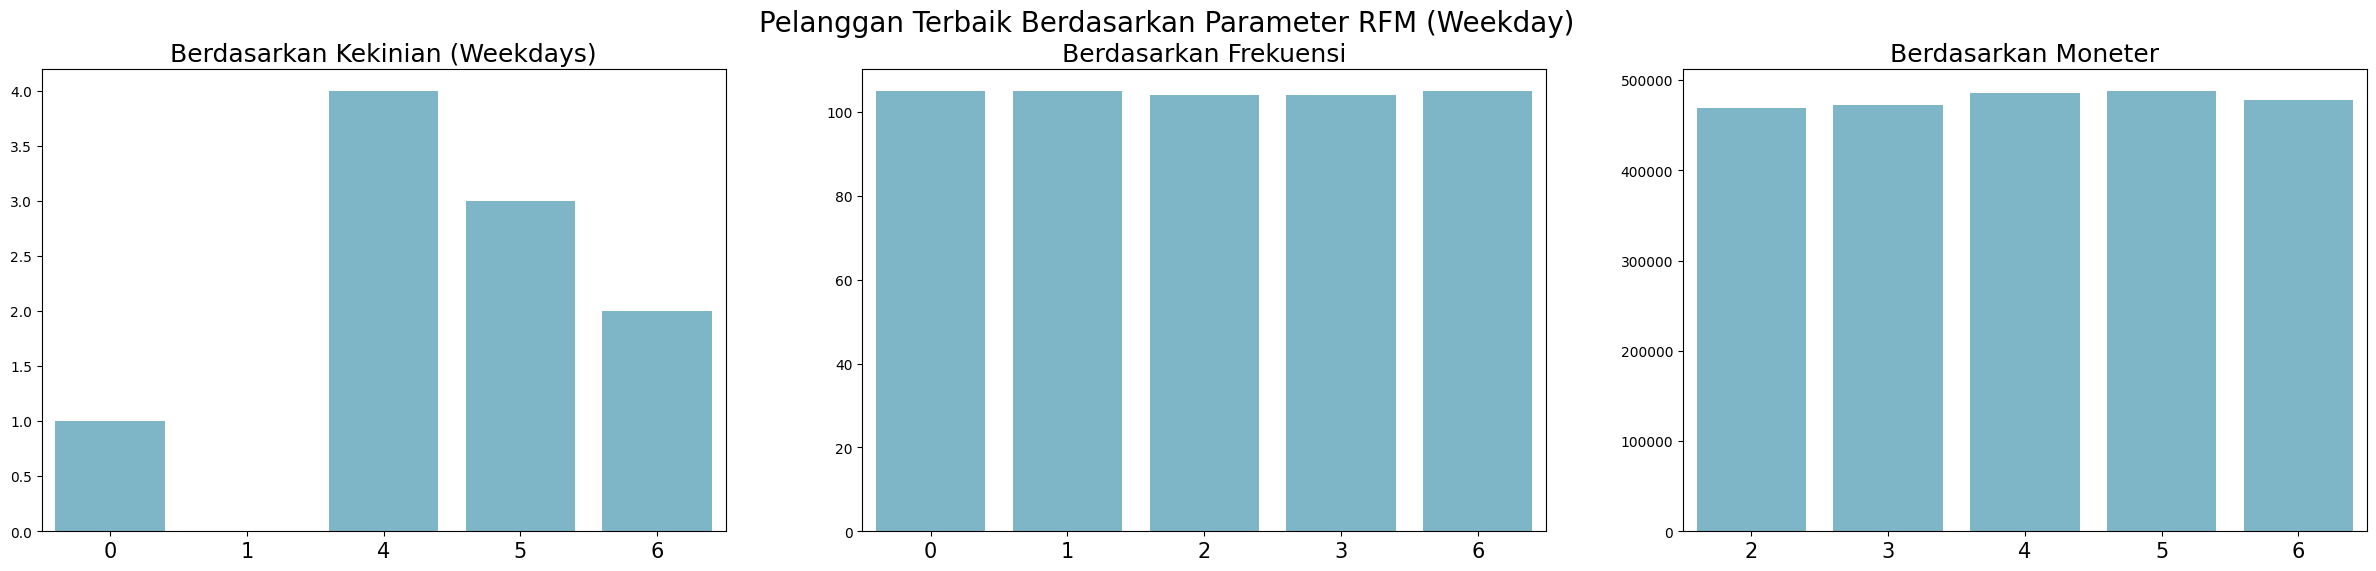

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="weekday", data=rfm_analysis.sort_values(by="recency", ascending=True).head(5), palette=colors, hue="weekday", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Kekinian (Weekdays)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="weekday", data=rfm_analysis.sort_values(by="frequency", ascending=False).head(5), palette=colors, hue="weekday", legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Frekuensi", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="weekday", data=rfm_analysis.sort_values(by="monetary", ascending=False).head(5), palette=colors, hue="weekday", legend=False, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Moneter", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Pelanggan Terbaik Berdasarkan Parameter RFM (Weekday)", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1:
  - Jumlah penyewa mengalami peningkatan dari tahun 2011 ke 2012
- Conclution pertanyaan 2:
  - Pada rush hour (jam sibuk) banyak orang melakukan persewaan sepeda
  - Pada malam menuju pagi hari (subuh) penyewaan sepeda mengalami penurunan
- Conclution pertanyaan 3:
  - Musim gugur merupakan musim yang paling banyak melakukan persewaan sepeda
- Conclution pertanyaan 4:
  - Cuaca sangat berpengaruh terhadap persewaan
- Conclution pertanyaan 5:
  - Persewaan sepeda lebih banyak dilakukan pada hari kerja (working day)
  - Pengguna dengan status casual lebih banyak melakukan sewa pada hari libur
  - Pengguna dengan status registered lebih banyak melakukan sewa pada hari kerja